In [1]:
# importing the packages
%matplotlib inline      
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import pandas as pd
import numpy as np
import psycopg2
import sqlalchemy
from sqlalchemy import create_engine

In [2]:
try:
    connection = psycopg2.connect(user = "spyfu",
                                  password = "SpyfuU$3r",
                                  host = "18.219.13.131",
                                  port = "5432",
                                  database = "spyfu")
    cursor = connection.cursor()
except (Exception, psycopg2.Error) as error :
    print ("Error while connecting to PostgreSQL ", error)
else:
    print("Connection established")

Connection established


In [3]:
cursor.execute("select channel, count(*) from click_agg_poc where uuid!='undefined' group by channel ")
ch = cursor.fetchall()
print(len(ch))

3


In [4]:
ch

[('M', 10924), ('A', 232136), ('D', 3263)]

In [5]:
channel = pd.DataFrame(ch)
channel.columns = ['Channel', 'Count']

In [6]:
channel = channel.sort_values(by='Count', ascending = False)
channel

,Channel,Count
1,A,232136
0,M,10924
2,D,3263


In [7]:
x = {'A':'App','M':'Mobile-Site','D':'Desktop-Site'}
p = []
for i in channel['Channel']:
    p.append(x[i])
p

['App', 'Mobile-Site', 'Desktop-Site']

In [8]:
channel['Channel'] = p
channel

,Channel,Count
1,App,232136
0,Mobile-Site,10924
2,Desktop-Site,3263


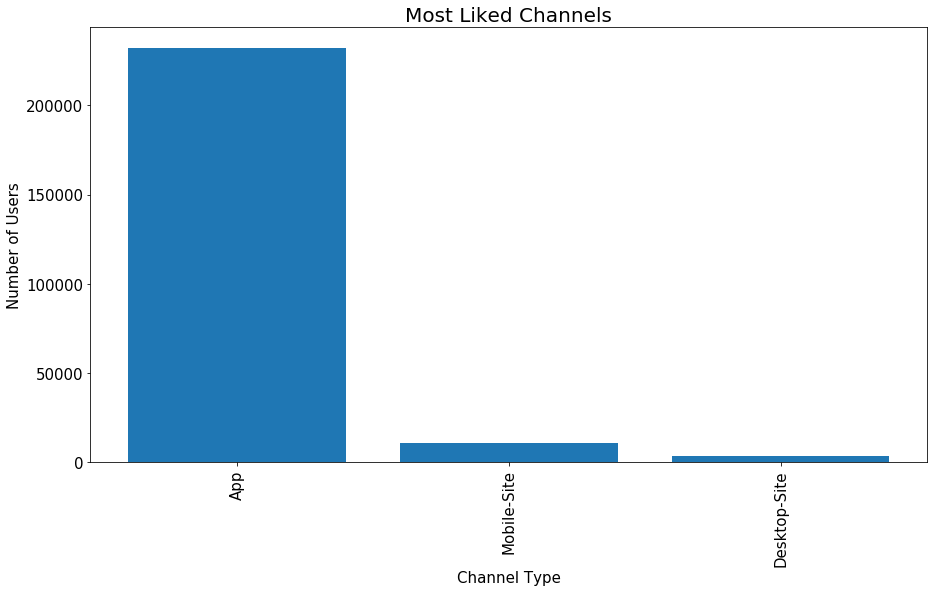

In [9]:
f, ax = plt.subplots(figsize=(15, 8)) 
y_pos = np.arange(3)
plt.bar(y_pos, channel['Count'])
plt.xticks(y_pos, channel['Channel'],fontsize=15, rotation = 90)
plt.yticks(fontsize=15)
plt.xlabel('Channel Type',fontsize=15)
plt.ylabel('Number of Users',fontsize=15)
plt.title('Most Liked Channels',fontsize=20)
plt.show()